In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
!pip install catboost
!pip install dask

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


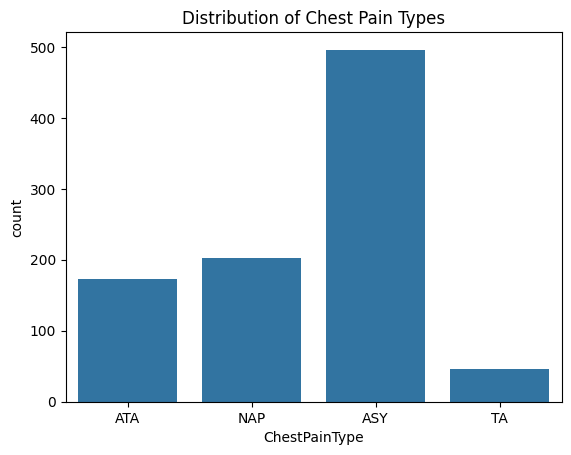

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='ChestPainType')
plt.title('Distribution of Chest Pain Types')
plt.show()


In [ ]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


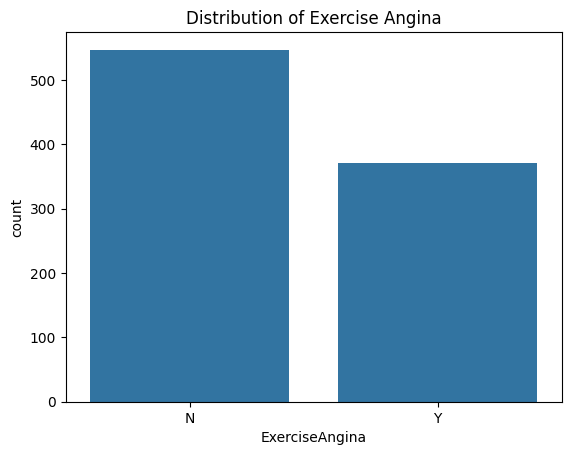

In [ ]:
sns.countplot(data=df, x='ExerciseAngina')
plt.title('Distribution of Exercise Angina')
plt.show()


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


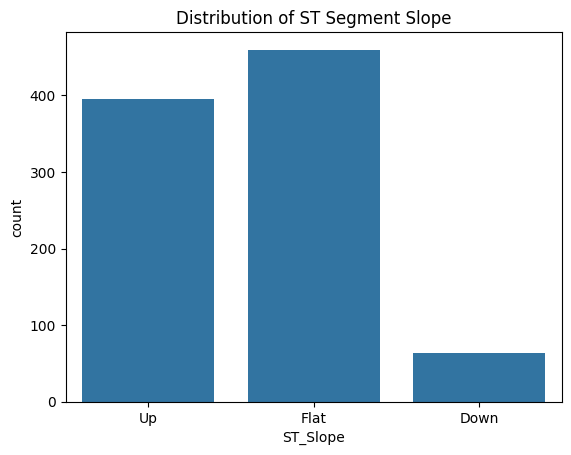

In [ ]:
sns.countplot(data=df, x='ST_Slope')
plt.title('Distribution of ST Segment Slope')
plt.show()


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


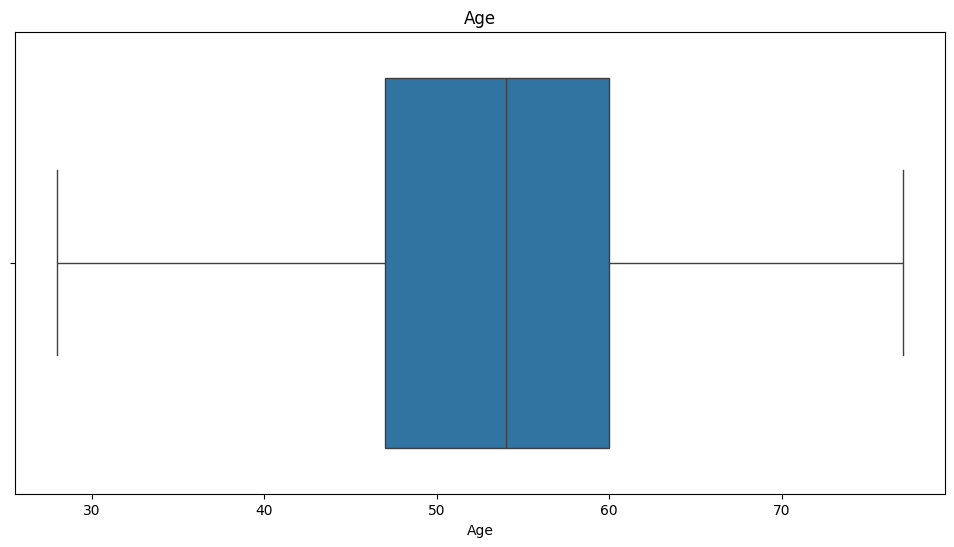

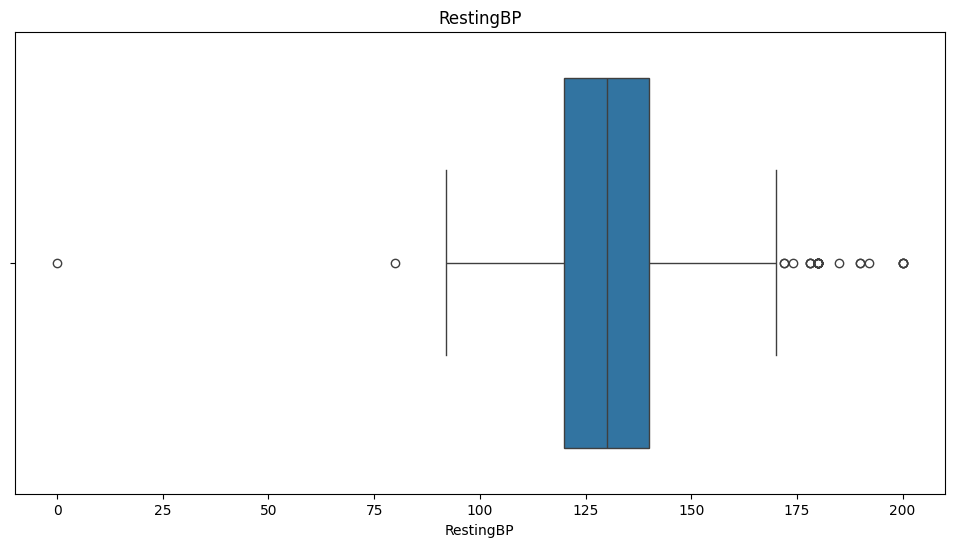

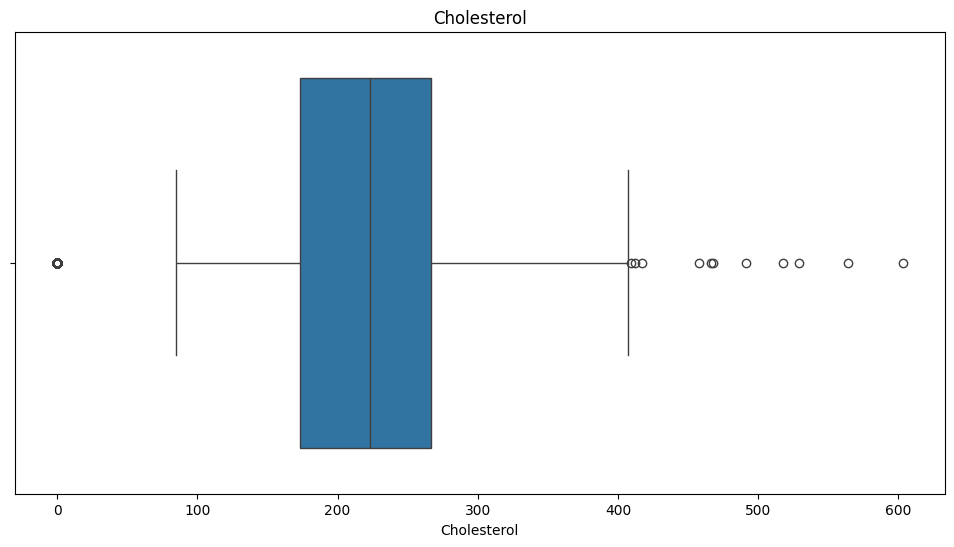

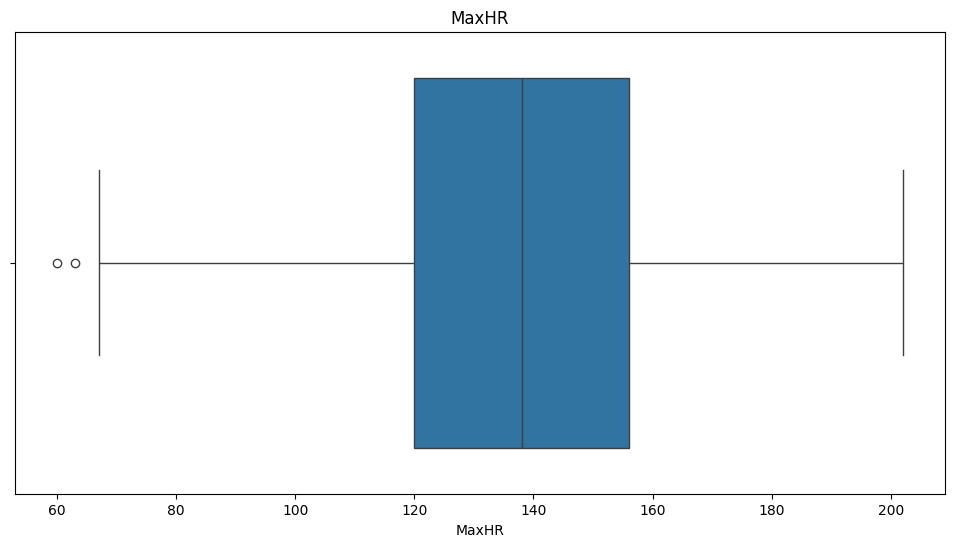

In [ ]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()

In [ ]:
df = df[(df['RestingBP'] !=0) & (df['Cholesterol']!=0)]

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


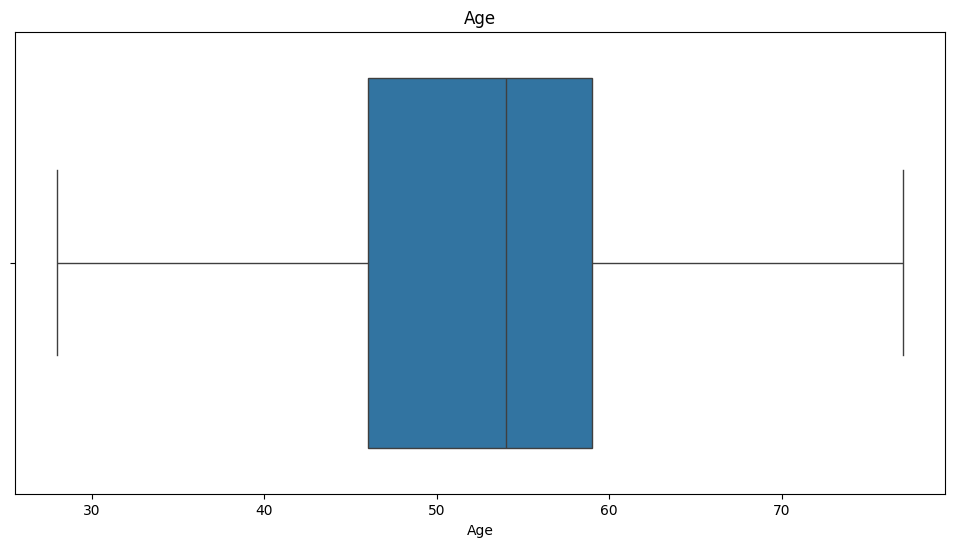

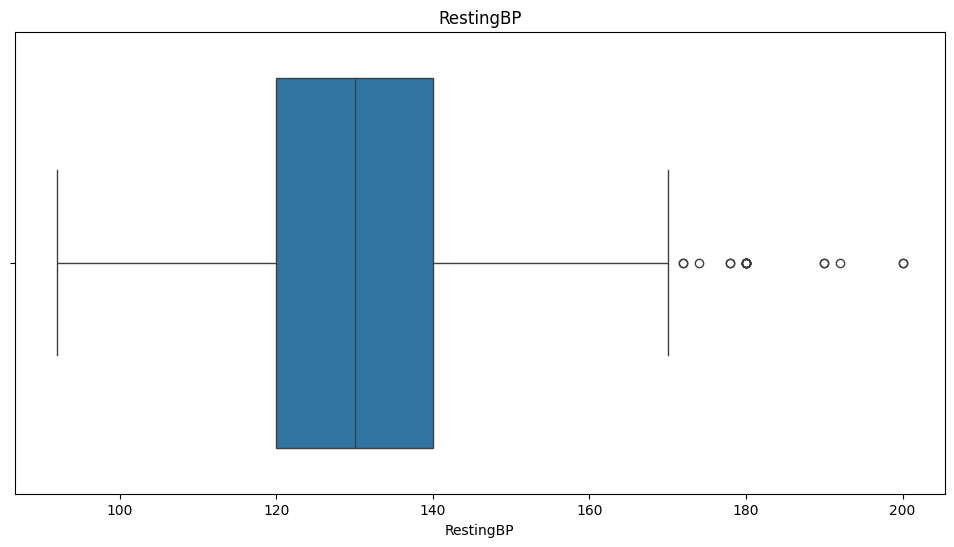

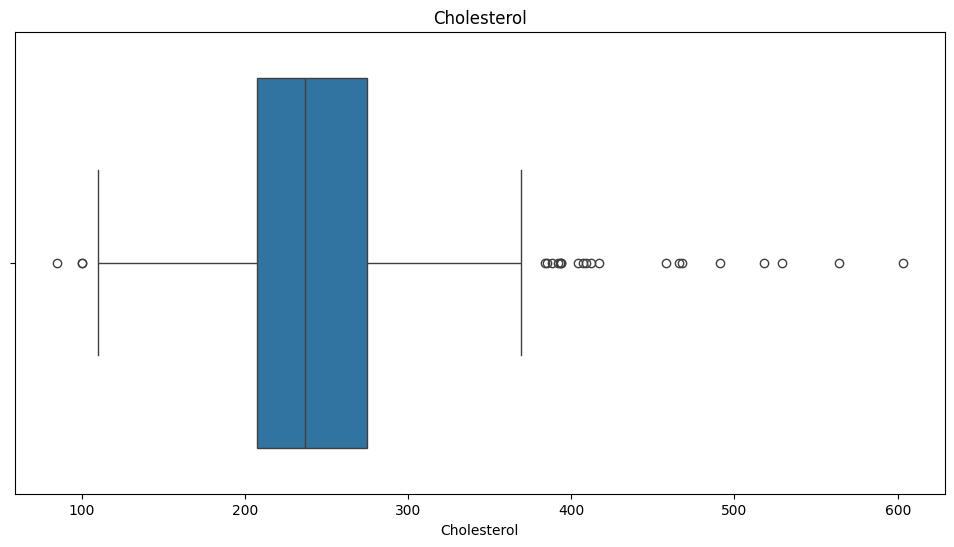

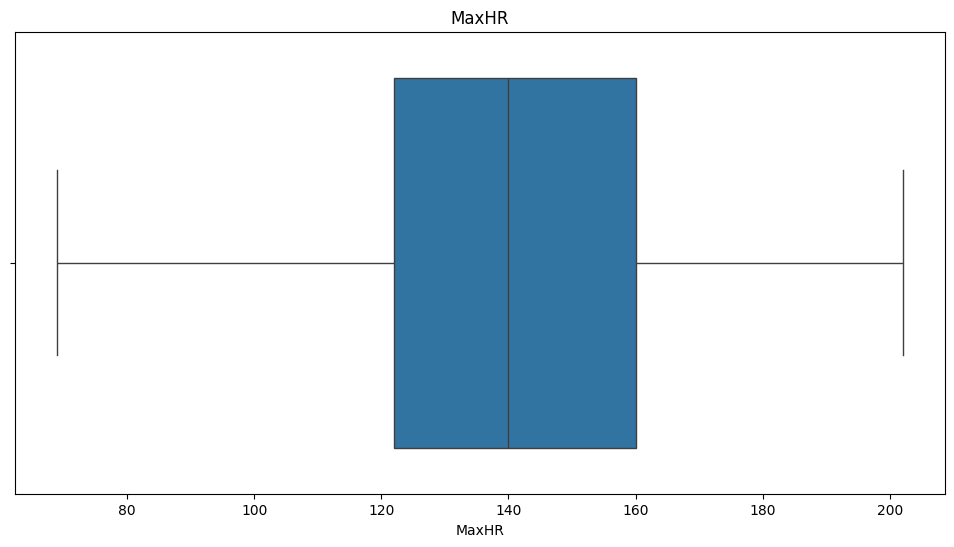

In [ ]:
columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

for column in columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.show()


In [ ]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [ ]:
encoder = LabelEncoder()

X['Sex'] = encoder.fit_transform(X['Sex'])
X['ChestPainType'] = encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = encoder.fit_transform(X['ST_Slope'])


In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size=0.2 , random_state=101)

# **Logistic Regression**



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_model.score(X_train,y_train)

0.8439597315436241

In [ ]:
y_pred_lr = lr_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        72
           1       0.91      0.91      0.91        78

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

Confusion Matrix:
[[65  7]
 [ 7 71]]
Accuracy: 0.9066666666666666


# **Support Vector Machine**

In [ ]:
svc = SVC(C=15, gamma=0.001)

svc.fit(X_train, y_train)

SVC(C=15, gamma=0.001)

In [ ]:
svc.score(X_train, y_train)

0.8875838926174496

In [ ]:
y_pred_svc = svc.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

print(f'Accuracy: {accuracy_score(y_test, y_pred_svc)}')




Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        72
           1       0.83      0.74      0.78        78

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150

Confusion Matrix:
[[60 12]
 [20 58]]
Accuracy: 0.7866666666666666


# **KNN** - K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.7651006711409396

In [ ]:
y_pred_knn = knn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        72
           1       0.73      0.67      0.70        78

    accuracy                           0.70       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.70      0.70      0.70       150

Confusion Matrix:
[[53 19]
 [26 52]]


In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.70


# **Random Forest Classifer**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, min_impurity_decrease=0.001)

rf_model.fit(X_train, y_train)


RandomForestClassifier(min_impurity_decrease=0.001, n_estimators=200)

In [ ]:
print(rf_model.score(X_train, y_train))

0.964765100671141


In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("accuracy")
print(accuracy_score(y_test, y_pred_rf))

# Generate and print confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

accuracy
0.92
Confusion Matrix:
[[65  7]
 [ 5 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        72
           1       0.91      0.94      0.92        78

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



# **XG BOOST Classification**

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001, verbosity=0)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.score(X_train, y_train)


0.9429530201342282

In [ ]:
# Predict on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")

# Generate and print confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)

# Generate and print classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Test Accuracy: 0.91
XGBoost Confusion Matrix:
[[64  8]
 [ 6 72]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.90      0.92      0.91        78

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



# **CAT Booster Classification**

In [ ]:
cat = CatBoostClassifier(n_estimators=500)

cat.fit(X_train, y_train)

Learning rate set to 0.015596
0:	learn: 0.6803088	total: 48.4ms	remaining: 24.1s
1:	learn: 0.6666427	total: 49.9ms	remaining: 12.4s
2:	learn: 0.6545853	total: 53.7ms	remaining: 8.89s
3:	learn: 0.6436507	total: 55.2ms	remaining: 6.85s
4:	learn: 0.6309128	total: 58.1ms	remaining: 5.75s
5:	learn: 0.6202010	total: 61.4ms	remaining: 5.05s
6:	learn: 0.6091307	total: 63.9ms	remaining: 4.5s
7:	learn: 0.6002342	total: 66.2ms	remaining: 4.07s
8:	learn: 0.5888032	total: 68.6ms	remaining: 3.75s
9:	learn: 0.5802129	total: 71.4ms	remaining: 3.5s
10:	learn: 0.5725808	total: 74.1ms	remaining: 3.29s
11:	learn: 0.5621431	total: 76.9ms	remaining: 3.13s
12:	learn: 0.5523103	total: 79.6ms	remaining: 2.98s
13:	learn: 0.5442230	total: 82.3ms	remaining: 2.86s
14:	learn: 0.5367086	total: 85.1ms	remaining: 2.75s
15:	learn: 0.5298867	total: 87.9ms	remaining: 2.66s
16:	learn: 0.5223761	total: 90.7ms	remaining: 2.58s
17:	learn: 0.5142016	total: 93.5ms	remaining: 2.5s
18:	learn: 0.5090121	total: 95.9ms	remaining: 2

In [ ]:
cat.score(X_train, y_train)

0.9765100671140939

In [ ]:
#Predict on the test data
y_pred_cat = cat.predict(X_test)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Test Accuracy: {accuracy_cat:.2f}")

# Generate and print confusion matrix
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
print("CatBoost Confusion Matrix:")
print(conf_matrix_cat)

# Generate and print classification report
print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

CatBoost Test Accuracy: 0.92
CatBoost Confusion Matrix:
[[64  8]
 [ 4 74]]

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        72
           1       0.90      0.95      0.93        78

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



# **DNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Initialize the model
dnn_model = Sequential()

# Input layer
dnn_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
dnn_model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Hidden layers
dnn_model.add(Dense(256, activation='relu'))  # Adding more neurons
dnn_model.add(Dropout(0.3))  # Dropout to prevent overfitting

dnn_model.add(Dense(128, activation='relu'))  # Another layer
dnn_model.add(Dropout(0.3))  # Dropout to prevent overfitting


dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.2))



# Output layer
dnn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification


In [ ]:
dnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Train the model
history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=1)
print("Training Accuracy per Epoch:")
for epoch, acc in enumerate(history.history['accuracy']):
    print(f"Epoch {epoch + 1}: Training Accuracy = {acc:.4f}")


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4763 - loss: 5.1226 - val_accuracy: 0.4800 - val_loss: 0.9401
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 2.1303 - val_accuracy: 0.5133 - val_loss: 0.7015
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5154 - loss: 1.7243 - val_accuracy: 0.6467 - val_loss: 0.6539
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5322 - loss: 1.0905 - val_accuracy: 0.5933 - val_loss: 0.6919
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5496 - loss: 0.9528 - val_accuracy: 0.4533 - val_loss: 0.7026
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.9060 - val_accuracy: 0.4733 - val_loss: 0.6940
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5363 - loss: 0.8231 - val_accuracy: 0.5200 - val_loss: 0.6944
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5027 - loss: 0.8827 - val_accuracy: 0.5267 - val_loss

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optional: Predict and show the confusion matrix and classification report
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dnn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dnn))


Test Accuracy: 0.74
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Confusion Matrix:
[[51 21]
 [18 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        72
           1       0.74      0.77      0.75        78

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150

